## **DATA SCIENCE PROJECT - Breast Cancer Classification**

In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/wisconsin_breast_cancer.csv"
df = pd.read_csv(file_path)

**Exploratory Data Analysis**

In [4]:
# Display the first few rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Display summary information about the DataFrame (columns, non-null counts, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Generate descriptive statistics for numerical columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# Print the number of missing values in each column
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

In [8]:
# Display the number of rows and columns in the DataFrame (rows, columns)
df.shape

(569, 33)

**Data** **Pre-Processing**

**1. Check Missing Values**

In [9]:
# Display a DataFrame of the same shape with True for missing values and False for non-missing values
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
# Print the number of missing values per column in the DataFrame
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

**2. Encoding Categorical Variables**

In [11]:
# Import LabelEncoder from sklearn to encode categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Apply transformation
df["diagnosis"] = encoder.fit_transform(df["diagnosis"])

# Verify: Now 'M' = 1 and 'B' = 0
print(df["diagnosis"].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


**3. Removing Unwanted Columns**

In [12]:
# Drop 'id' and 'Unnamed: 32' columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Verify changes
print(df.head())  # Check the first few rows

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [13]:
# Count the occurrences of each unique value in the 'diagnosis' column
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


1 --> Malignant

0 --> Benign

In [14]:
# Group by 'diagnosis' and calculate the mean of numerical features for each group (e.g., 'M' vs 'B')
df.groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


**3. Visualization of Class Distribution**

**(i) Bar Graph**

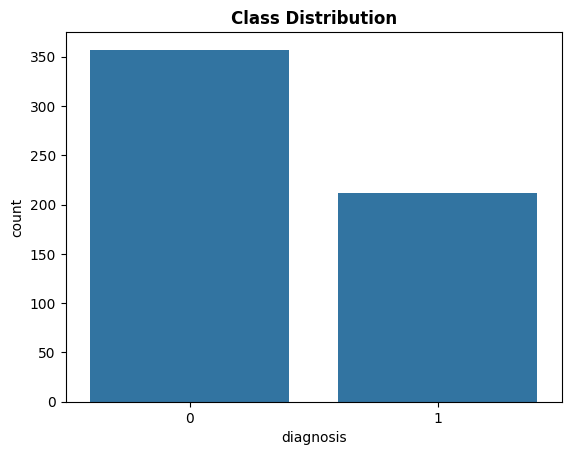

In [15]:
# Create a count plot to visualize the distribution of classes in the 'diagnosis' column
sns.countplot(x=df["diagnosis"])

# Add a title to the plot with bold font
plt.title("Class Distribution", fontweight="bold")

# Show the plot
plt.show()

**(ii) Pie Chart**

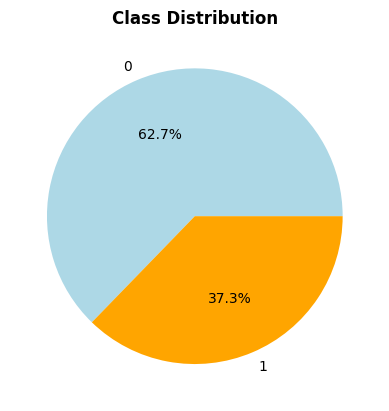

In [16]:
# Plot a pie chart to visualize the distribution of the 'diagnosis' column
df["diagnosis"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange"])
plt.title("Class Distribution", fontweight="bold")
plt.ylabel("")
plt.show()

**4. Feature Selection**

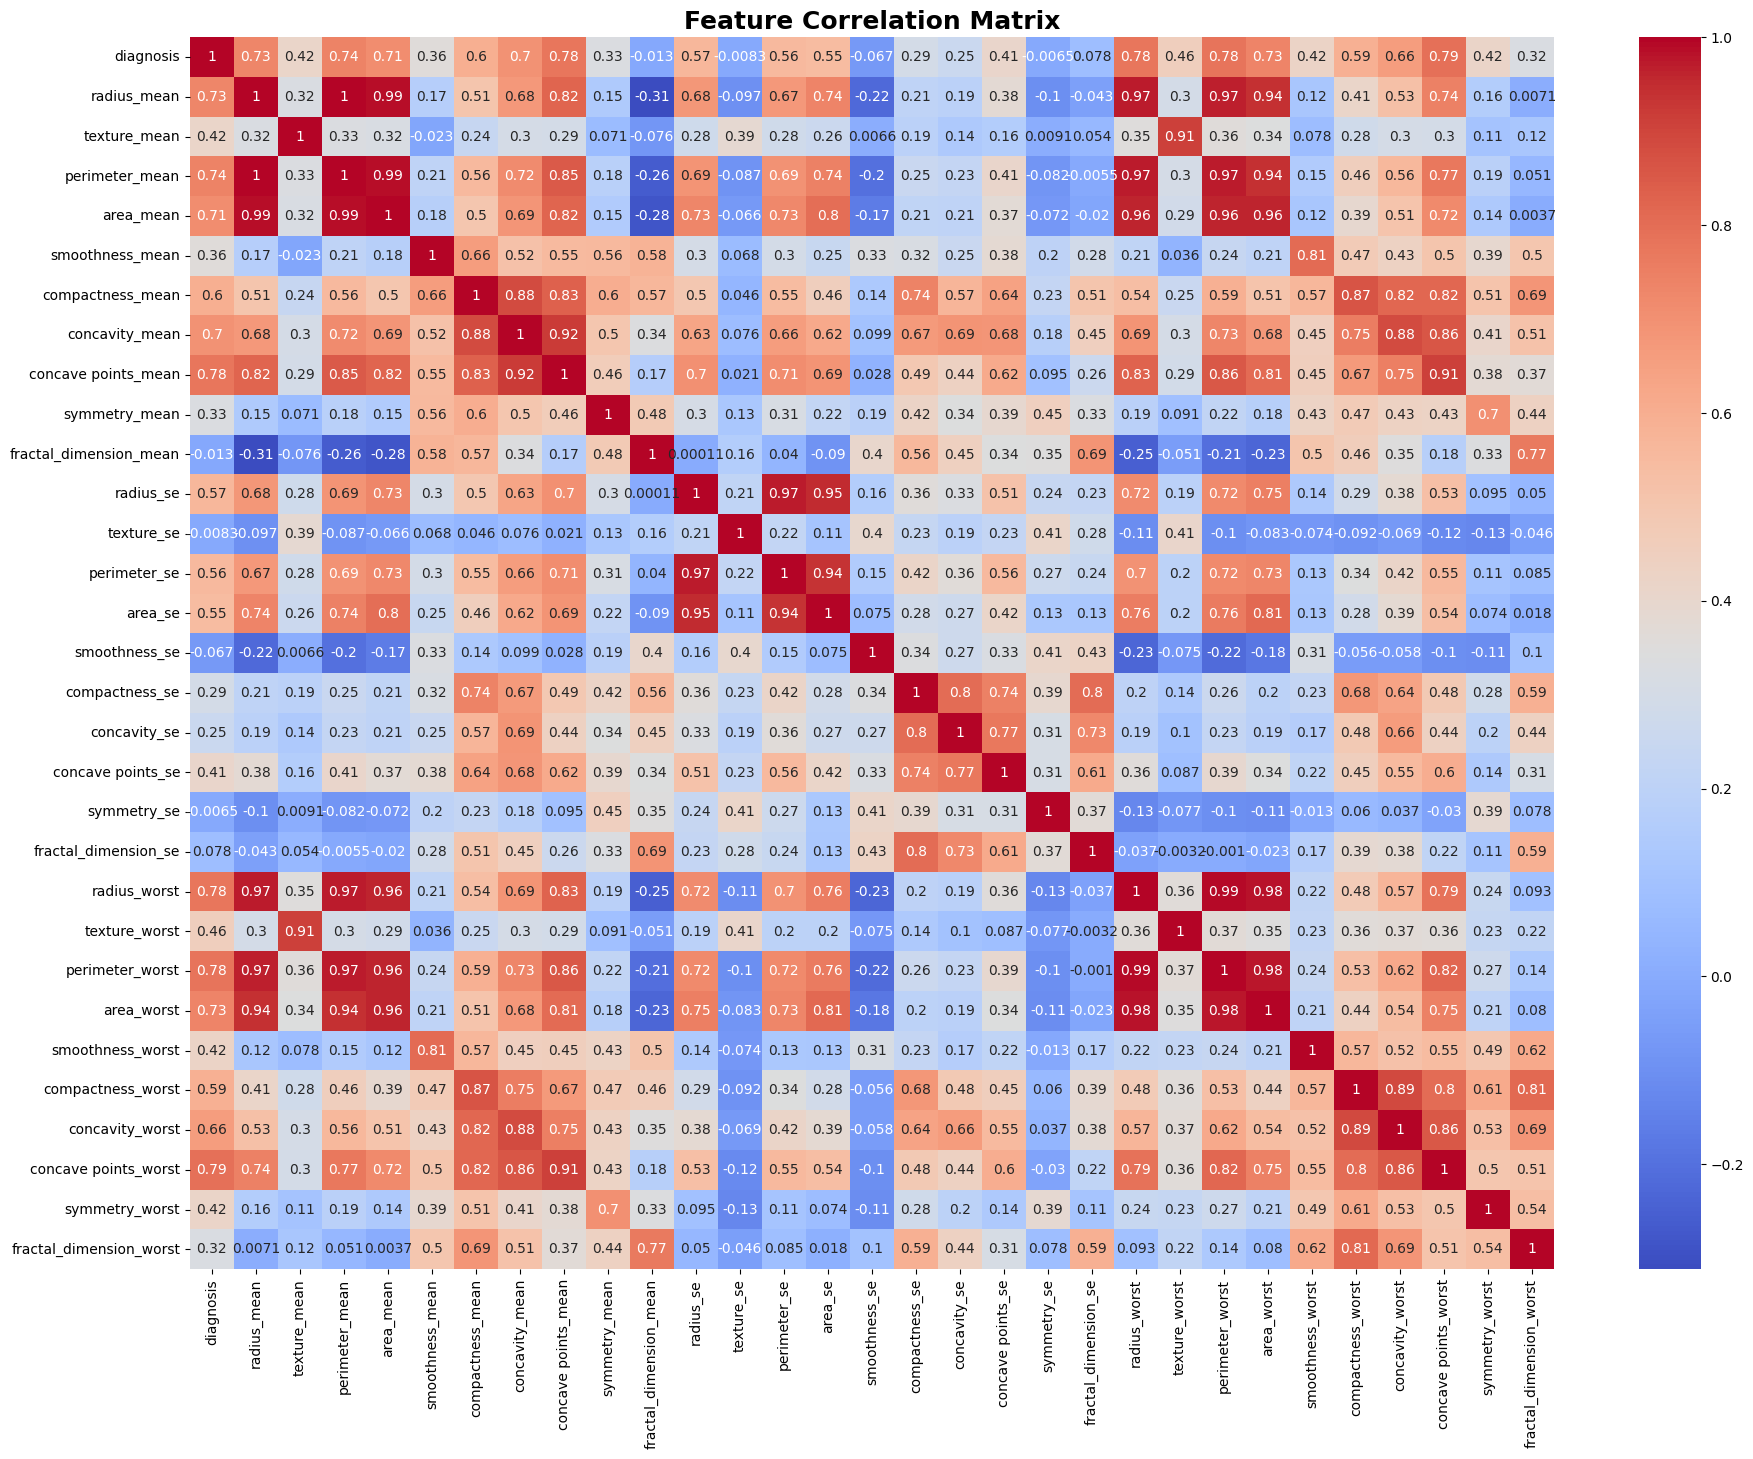

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(22,16))

# Create a heatmap to visualize the correlation matrix with annotations and a color palette
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Set the title and show the plot
plt.title("Feature Correlation Matrix", fontsize=18, fontweight='bold')
plt.show()

**5. Define Features and the Target Variable**

In [18]:
# Define features (X) - selected best features
selected_features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
X = df[selected_features]

# Define target (y) - "diagnosis" column
y = df["diagnosis"]

In [19]:
X.head()

,radius_mean,concave points_worst,perimeter_worst,concavity_mean,compactness_worst
0,17.99,0.2654,184.60,0.3001,0.6656
1,20.57,0.1860,158.80,0.0869,0.1866
2,19.69,0.2430,152.50,0.1974,0.4245
3,11.42,0.2575,98.87,0.2414,0.8663
4,20.29,0.1625,152.20,0.1980,0.2050


In [20]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


**6. Visualizing the Distribution of Selected Features**

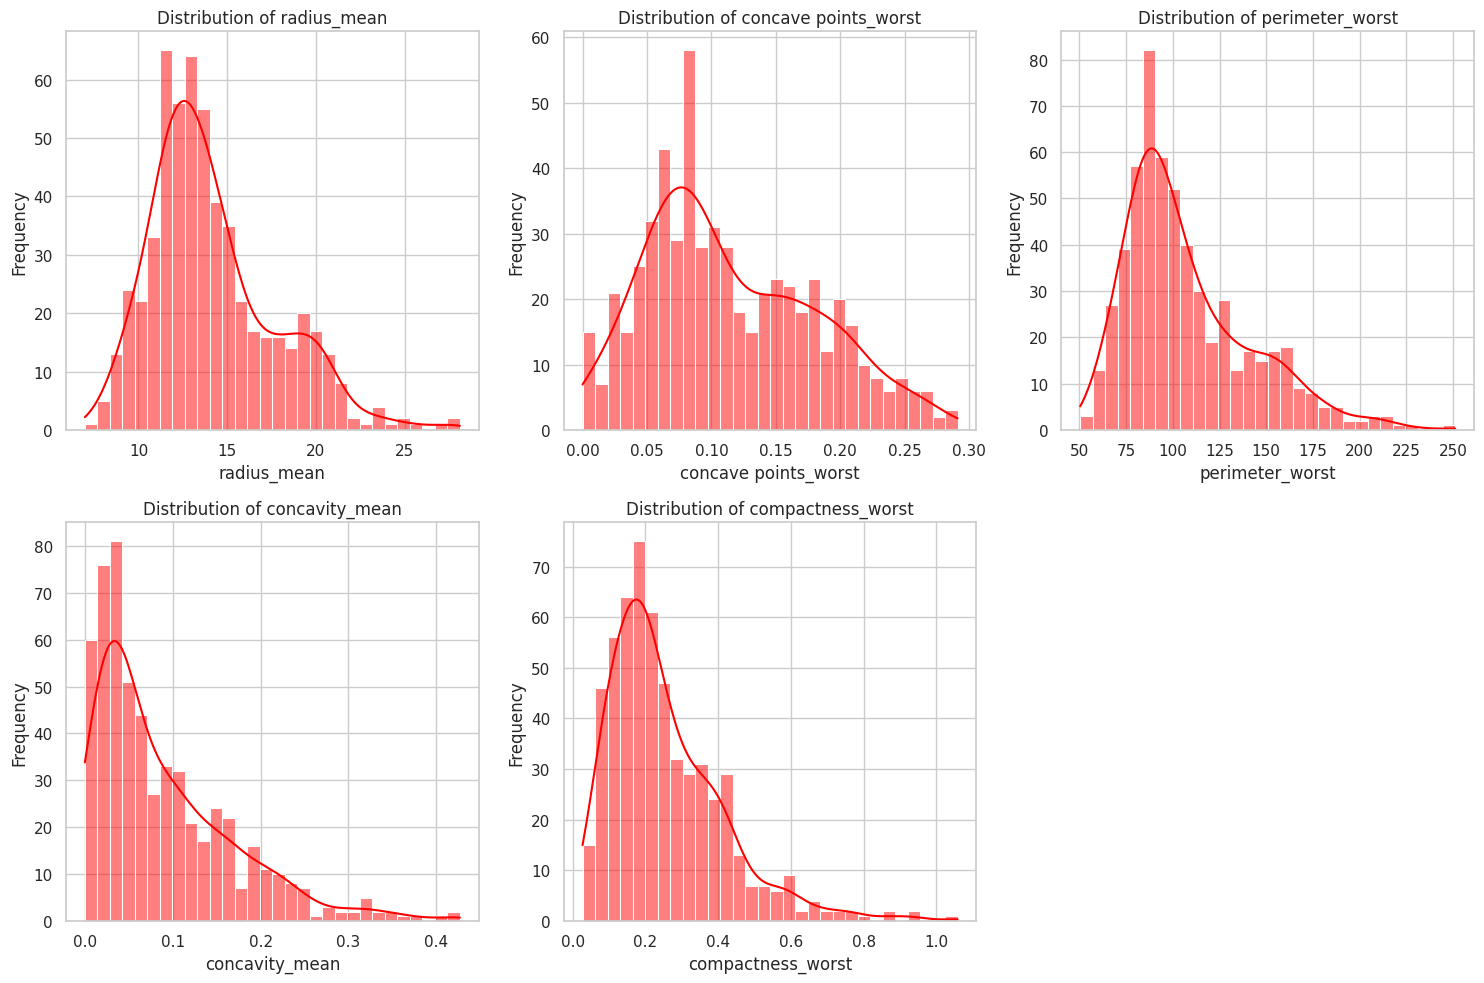

In [21]:
# Set the style
sns.set(style="whitegrid")

# Create histograms for each selected feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='red')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**6. Pairplot of Selected Features by Diagnosis**

<ipython-input-22-23cde25cfaf3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df["diagnosis"] = pairplot_df["diagnosis"].map({0: "Benign", 1: "Malignant"})


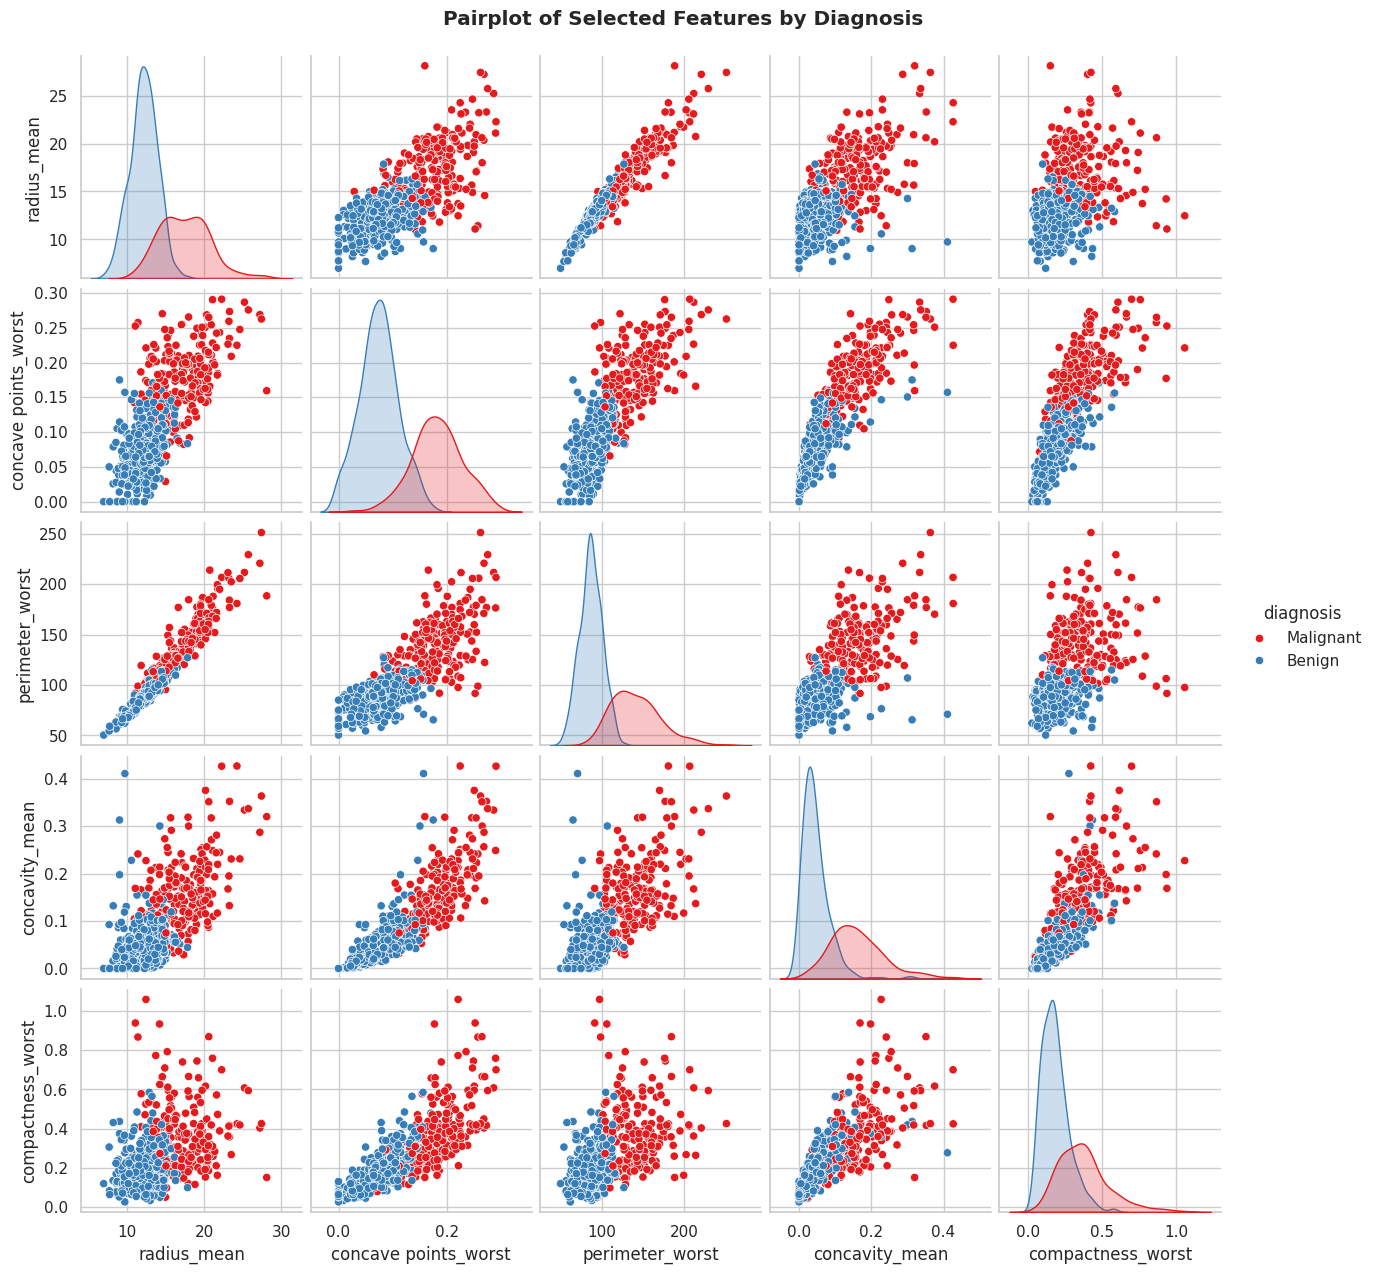

In [22]:
# Create a new DataFrame with only selected features and the target
pairplot_df = df[["radius_mean", "concave points_worst", "perimeter_worst",
                  "concavity_mean", "compactness_worst", "diagnosis"]]

# Convert diagnosis to string if it’s encoded as 0/1
pairplot_df["diagnosis"] = pairplot_df["diagnosis"].map({0: "Benign", 1: "Malignant"})

# Create pairplot
sns.pairplot(pairplot_df, hue="diagnosis", palette="Set1", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02, fontweight="bold")
plt.show()

**7. Dimensionality Reduction - PCA Visualization in 2D**

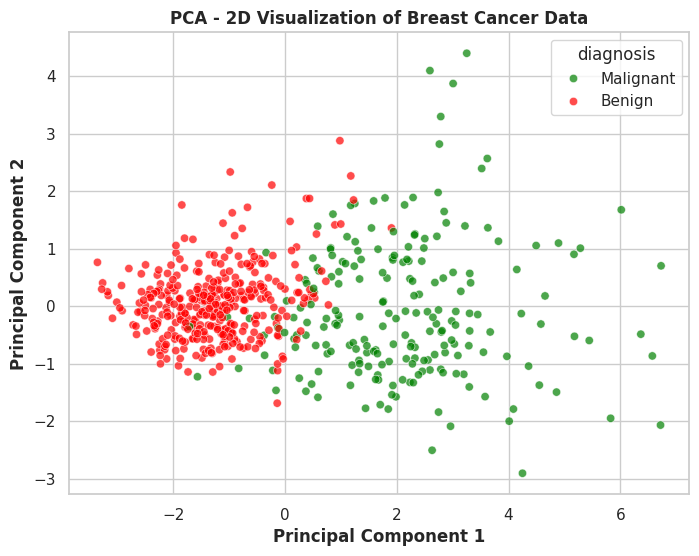

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])

# Step 2: Run PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Create a DataFrame with PCA components + labels
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["diagnosis"] = df["diagnosis"].map({0: "Benign", 1: "Malignant"})

# Step 4: Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="diagnosis", palette=["green", "red"], alpha=0.7)
plt.title("PCA - 2D Visualization of Breast Cancer Data", fontweight='bold')
plt.xlabel("Principal Component 1", fontweight='bold')
plt.ylabel("Principal Component 2", fontweight='bold')
plt.grid(True)
plt.show()

# **Model Development for Classification**

## **1. Logistic Regression Model**

In [24]:
# --- Importing Necessary Libraries ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [25]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Verify the split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (455, 5)
Testing set size: (114, 5)


**Feature Scaling**

In [27]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Training**

In [28]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

In [29]:
# Fit the model to the training data
logreg_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [30]:
# Predict using the trained model
y_pred_log_reg = logreg_model.predict(X_test_scaled)
y_pred_log_reg

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

**Model Evaluation**

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score

In [32]:
# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Accuracy: 0.9649122807017544


In [33]:
# Get the probability scores for ROC AUC
logreg_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
# Print metrics
print("\nLOGISTIC REGRESSION METRICS")
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("ROC AUC:", roc_auc_score(y_test, logreg_proba))


LOGISTIC REGRESSION METRICS
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1 Score: 0.9534883720930233
ROC AUC: 0.9970520799213889


**Check for Overfitting**

In [35]:
train_accuracy = logreg_model.score(X_train_scaled, y_train)
test_accuracy = logreg_model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9319
Testing Accuracy: 0.9649


**Cross Validation Score**

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

Cross-validation Accuracy: 0.9297


**Classification Report & Confusion Matrix**

In [37]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[69  2]
 [ 2 41]]


## **Test the Predictive System**

In [38]:
#create a function

def predict_diagnosis(input_data):


    # Convert input data to NumPy array and reshape for a single prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Scale the input data (same scaling used for training data)
    input_scaled = scaler.transform(input_array)

    # Make the prediction
    prediction = logreg_model.predict(input_scaled)

    # Output result
    if prediction[0] == 1:
        return "Malignant Breast Cancer"
    else:
        return "Benign Breast Cancer"


Sample Prediction #1

In [39]:
# Example input
input_data = [11.20,	0.00000,75.19,	0.00000,	0.05494]

# Make prediction
result = predict_diagnosis(input_data)
print("Prediction:", result)

Prediction: Benign Breast Cancer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sample Prediction  #2

In [40]:
input_data = [15.22,	0.23560,	128.70,	0.25500,	0.79170]

# Make prediction
result = predict_diagnosis(input_data)
print("Prediction:", result)

Prediction: Malignant Breast Cancer


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **2. XGBoost Algorithm**

In [41]:
import xgboost as xgb

In [42]:
#selected_features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
#X = df[selected_features]
#y = df["diagnosis"]

In [43]:
# Calculate the number of malignant and benign samples in the training set
malignant = sum(y_train == 1)
benign = sum(y_train == 0)

# Compute the scale to handle class imbalance (ratio of benign to malignant)
scale = benign / malignant

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:50:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [44]:
# Predict the labels for the test set
y_pred_xgb = xgb_model.predict(X_test)

In [45]:
# Calculate Accuracy for the XGB model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Accuracy: 0.9649122807017544


In [46]:
# Get the predicted probabilities for the positive class (1)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

In [47]:
# Print additional metrics for evaluation
print("\nXGBoost Metrics:")
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))


XGBoost Metrics:
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1 Score: 0.9534883720930233
ROC AUC: 0.9950867998689813


**Classification Report & Confusion Matrix**

In [48]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Confusion Matrix:
 [[69  2]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



**Feature Importance Plot — XGBoost**

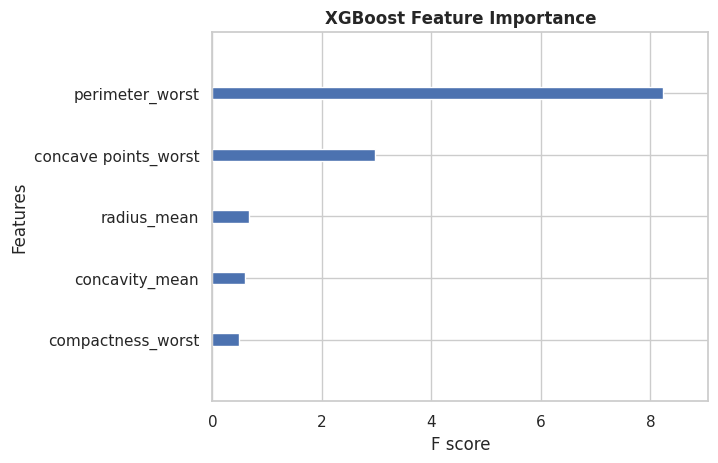

In [49]:
xgb.plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance", fontweight='bold')
plt.show()

## **Test the Predictive System**

In [50]:
def predict_cancer(input_data):
    features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
    input_df = pd.DataFrame([input_data], columns=features)

    # Predict probability
    prob = xgb_model.predict_proba(input_df)[0][1]  # Probability of malignant

    label = "Malignant" if prob > 0.5 else "Benign"
    return label, round(prob * 100, 2)

In [51]:
new_patient = [13.54, 0.1288, 99.7, 0.06664, 0.1773]  # Example input
label, confidence = predict_cancer(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Benign (0.11999999731779099% confidence)


In [52]:
new_patient = [15.22,	0.23560,	128.70,	0.25500,	0.79170]  # Example input
label, confidence = predict_cancer(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Malignant (99.95999908447266% confidence)


## **Random Forest Model**

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
# Initialize the Random Forest classifier with 100 trees (estimators)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Predict the labels for the test set
y_pred_rf = rf_model.predict(X_test)

In [56]:
# Calculate the Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.956140350877193


In [57]:
# Get the predicted probabilities for the positive class (1)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [58]:
# Print Additional Metrics
print("\nRandom Forest Metrics:")
print("Precision:", precision_score(y_taest, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))


Random Forest Metrics:
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882353
ROC AUC: 0.99475925319358


**Classification Report & Confusion Matrix**

In [59]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## **Test the Predictive System**

In [60]:
def predict_cancer_rf(input_data):
    features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
    input_df = pd.DataFrame([input_data], columns=features)

    prediction = rf_model.predict(input_df)[0]
    probability = rf_model.predict_proba(input_df)[0][1]

    label = "Malignant" if prediction == 1 else "Benign"
    return label, round(probability * 100, 2)

In [61]:
new_patient = [15.22,	0.23560,	128.70,	0.25500,	0.79170]
label, confidence = predict_cancer_rf(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Malignant (100.0% confidence)


In [62]:
new_patient = [13.54, 0.1288, 99.7, 0.06664, 0.1773]
label, confidence = predict_cancer_rf(new_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Benign (3.0% confidence)


 **Feature Importance Plot**

<ipython-input-63-76324a6d93d2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


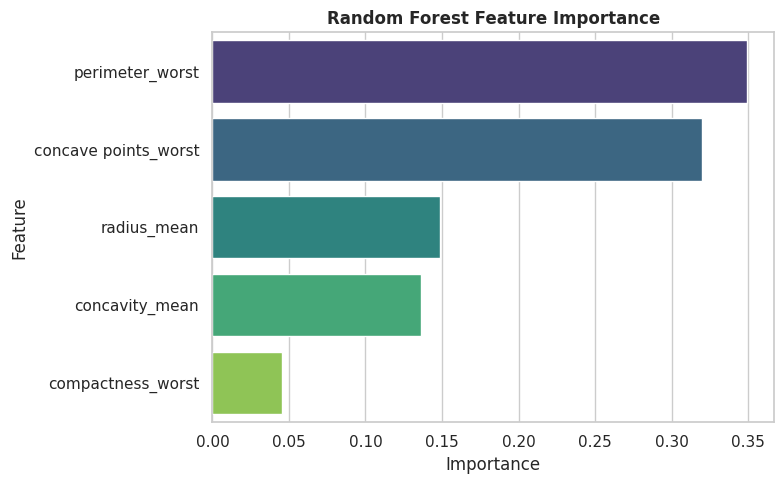

In [63]:
importances = rf_model.feature_importances_
feature_names = selected_features

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Random Forest Feature Importance", fontweight='bold')
plt.tight_layout()
plt.show()

# **Support Vector Machine**

In [64]:
from sklearn.svm import SVC

In [65]:
# Initialize the Support Vector Machine classifier with RBF kernel
svm_model = SVC(probability=Traue, kernel='rbf', random_state=42)

# Fit the SVM model to the scaled training data
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [66]:
# Predict the labels for the scaled test set
y_pred_svm = svm_model.predict(X_test_scaled)

In [67]:
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

In [68]:
#Calculate Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9473684210526315


In [69]:
# Print Additional Metricsprint("\nSVM Metrics:")
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm_proba))

Precision: 0.9512195121951219
Recall: 0.9069767441860465
F1 Score: 0.9285714285714286
ROC AUC: 0.9970520799213889


**Classification Report & Confusion Matrix**

In [70]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Confusion Matrix:
 [[69  2]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## **Test the Predictive System**

In [71]:
def predict_cancer_svm(input_data):
    features = ["radius_mean", "concave points_worst", "perimeter_worst", "concavity_mean", "compactness_worst"]
    input_df = pd.DataFrame([input_data], columns=features)

    # Scale input like training data
    input_scaled = scaler.transform(input_df)

    prediction = svm_model.predict(input_scaled)[0]
    probability = svm_model.predict_proba(input_scaled)[0][1]

    label = "Malignant" if prediction == 1 else "Benign"
    return label, round(probability * 100, 2)

In [72]:
test_patient = [13.54, 0.1288, 99.7, 0.06664, 0.1773]
label, confidence = predict_cancer_svm(test_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Benign (7.96% confidence)


In [73]:
test_patient = [15.22,	0.23560,	128.70,	0.25500,	0.79170]
label, confidence = predict_cancer_svm(test_patient)
print(f"Prediction: {label} ({confidence}% confidence)")

Prediction: Malignant (97.52% confidence)


## **Bar-Plot of Model Accuracies**

In [74]:
# Example accuracy values from your models
logreg_acc = accuracy_score(y_test, logreg_model.predict(X_test_scaled))
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
svm_acc = accuracy_score(y_test, svm_model.predict(X_test_scaled))

<ipython-input-75-b12c61eaf2e4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="pastel")


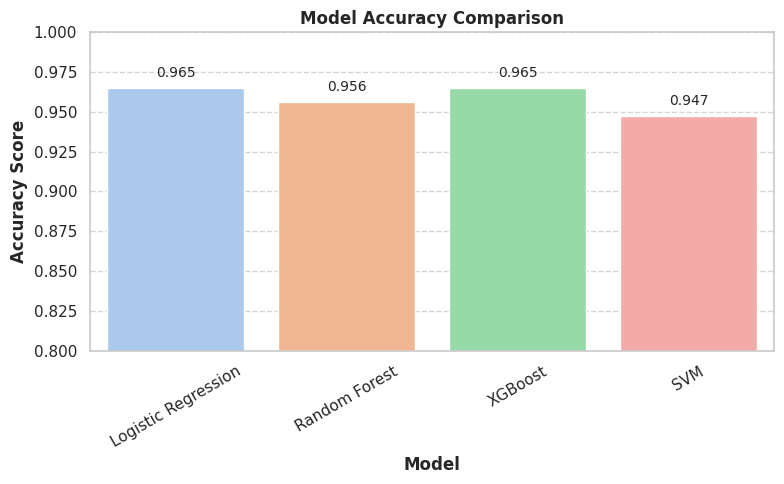

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample accuracies (replace with your real values)
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "SVM"]
accuracies = [logreg_acc, rf_acc, xgb_acc, svm_acc]

# Create DataFrame
acc_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="pastel")

# Annotate the bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=10)

plt.ylim(0.8, 1.0)
plt.title("Model Accuracy Comparison", fontweight="bold")
plt.ylabel("Accuracy Score", fontweight="bold")
plt.xlabel("Model", fontweight="bold")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

## **Bar-Plot for F1 Score and AUC**

In [76]:
from sklearn.metrics import f1_score, roc_auc_score

# Calculate F1-scores
logreg_f1 = f1_score(y_test, logreg_model.predict(X_test_scaled))
rf_f1     = f1_score(y_test, rf_model.predict(X_test))
xgb_f1    = f1_score(y_test, xgb_model.predict(X_test))
svm_f1    = f1_score(y_test, svm_model.predict(X_test_scaled))

<ipython-input-77-a92c16f7b3c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="husl")


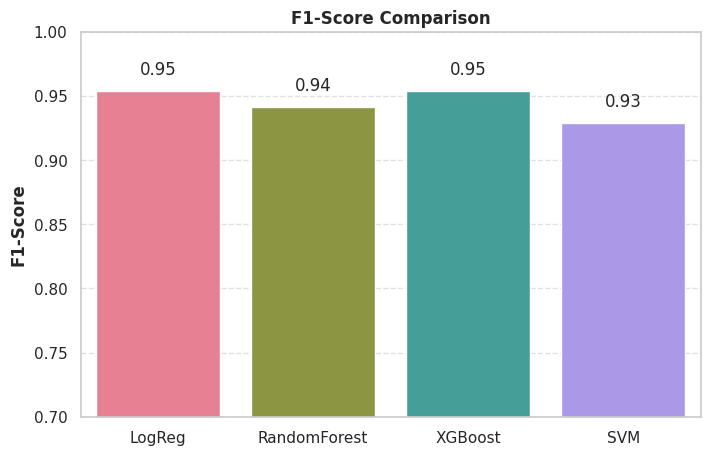

In [77]:
f1_scores = [logreg_f1, rf_f1, xgb_f1, svm_f1]
models = ["LogReg", "RandomForest", "XGBoost", "SVM"]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=f1_scores, palette="husl")

# Annotate
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.2f}", ha='center', va='bottom')

plt.title("F1-Score Comparison", fontweight="bold")
plt.ylabel("F1-Score", fontweight="bold")
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [78]:
# Calculate AUC scores
logreg_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
rf_auc     = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
xgb_auc    = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
svm_auc    = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])


# --- Print AUC Scores ---
print("\nAUC Scores for Each Model:")
print(f"Logistic Regression AUC: {logreg_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")
print(f"SVM AUC: {svm_auc:.4f}")



AUC Scores for Each Model:
Logistic Regression AUC: 0.9971
Random Forest AUC: 0.9948
XGBoost AUC: 0.9951
SVM AUC: 0.9971


In [81]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# --- Calculate Metrics for Each Model ---
# Accuracy
logreg_accuracy = accuracy_score(y_test, logreg_model.predict(X_test_scaled))
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))

# F1 Score
logreg_f1 = f1_score(y_test, logreg_model.predict(X_test_scaled))
rf_f1 = f1_score(y_test, rf_model.predict(X_test))
xgb_f1 = f1_score(y_test, xgb_model.predict(X_test))
svm_f1 = f1_score(y_test, svm_model.predict(X_test_scaled))

# Recall
logreg_recall = recall_score(y_test, logreg_model.predict(X_test_scaled))
rf_recall = recall_score(y_test, rf_model.predict(X_test))
xgb_recall = recall_score(y_test, xgb_model.predict(X_test))
svm_recall = recall_score(y_test, svm_model.predict(X_test_scaled))

# Precision
logreg_precision = precision_score(y_test, logreg_model.predict(X_test_scaled))
rf_precision = precision_score(y_test, rf_model.predict(X_test))
xgb_precision = precision_score(y_test, xgb_model.predict(X_test))
svm_precision = precision_score(y_test, svm_model.predict(X_test_scaled))

# AUC
logreg_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
svm_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])

# --- Store the Metrics in a DataFrame ---
metrics_data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM"],
    "Accuracy": [logreg_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
    "F1 Score": [logreg_f1, rf_f1, xgb_f1, svm_f1],
    "Recall": [logreg_recall, rf_recall, xgb_recall, svm_recall],
    "Precision": [logreg_precision, rf_precision, xgb_precision, svm_precision],
    "AUC": [logreg_auc, rf_auc, xgb_auc, svm_auc]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# --- Display the DataFrame ---
metrics_df


,Model,Accuracy,F1 Score,Recall,Precision,AUC
0,Logistic Regression,0.964912,0.953488,0.953488,0.953488,0.997052
1,Random Forest,0.956140,0.941176,0.930233,0.952381,0.994759
2,XGBoost,0.964912,0.953488,0.953488,0.953488,0.995087
3,SVM,0.947368,0.928571,0.906977,0.951220,0.997052


# **ROC Curve for all Models**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

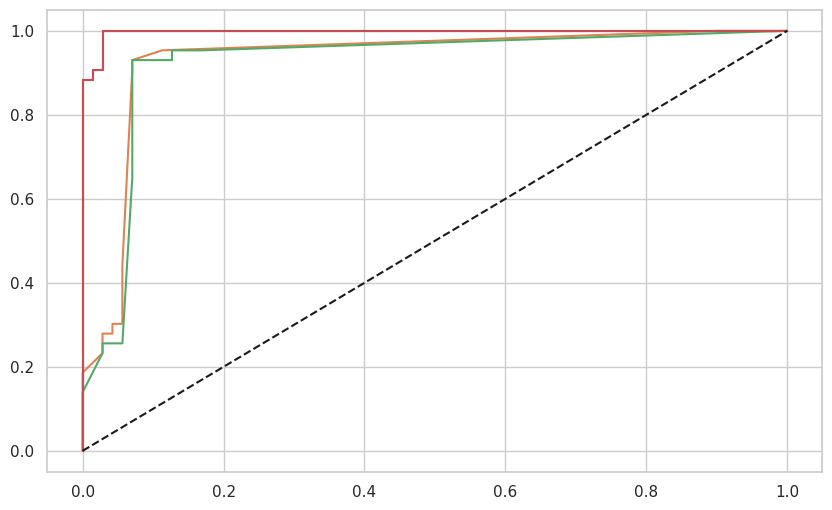

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
logreg_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)

roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel


# **Hyperparameter Tuning - XGBoost**

In [83]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Different learning rates
    'n_estimators': [50, 100, 200],  # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],  # Depth of the trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight in a child
    'subsample': [0.7, 0.8, 1.0],  # Fraction of training data used in each boosting round
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to split a node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.9429


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:00:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [84]:
from sklearn.model_selection import GridSearchCV
# 1. Get the best tuned model
best_xgb_model = grid_search.best_estimator_

# 2. Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# 3. Calculate and print the evaluation metrics
print("Tuned XGBoost Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.4f}")

Tuned XGBoost Model Metrics:
Accuracy: 0.9474
Precision: 0.9512
Recall: 0.9070
F1 Score: 0.9286
ROC AUC: 0.9964
